In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

import file

In [2]:
# Define the ticker symbol
tickerSymbol = 'SPY'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
history = tickerData.history(interval='1wk', start='2021-1-1', end=date.today())

In [5]:
max_weeks = 50
option_leverage = file.load_all_option_leverage()[tickerSymbol]
rows = []
for weeks, lvr in sorted(option_leverage.items()):
    stock_changes = history['Close'].pct_change(periods=weeks) * 100
    option_profits = (stock_changes[weeks:] * lvr - 100).clip(lower=-100)
    rows.append({
        'weeks': weeks,
        'mean_stock_change': stock_changes.mean() / weeks,
        'option_price': 100/lvr,
        'mean_option_profit': option_profits.mean()  / weeks,
        'theo_option_profit': (stock_changes.mean() * lvr - 100) / weeks,
        'option_leverage': lvr
    })

df = pd.DataFrame(rows).set_index('weeks')
display(df)

,mean_stock_change,option_price,mean_option_profit,theo_option_profit,option_leverage
weeks,,,,,
1,0.263933,0.781818,24.727306,-66.241072,127.906977
2,0.262661,1.173171,11.171203,-27.610993,85.239085
3,0.266229,1.527273,8.248560,-15.901697,65.476190
4,0.270321,1.797531,6.606241,-9.961530,55.631868
5,0.270568,2.069122,5.362748,-6.923513,48.329687
...,...,...,...,...,...
151,0.198577,16.486305,0.542243,0.542243,6.065641
152,0.200482,16.550000,0.553475,0.553475,6.042296
153,0.201867,16.614590,0.561405,0.561405,6.018806


<Axes: title={'center': 'SPY'}, xlabel='weeks'>

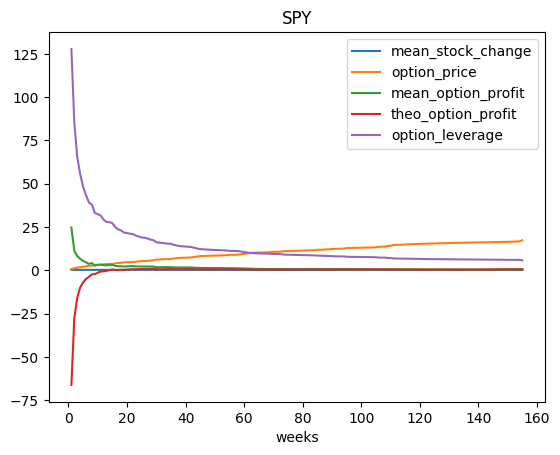

In [7]:
df.plot(title=tickerSymbol)